Libraries

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Penguins.csv Dataset

In [12]:

# Load dataset
df = pd.read_csv("../dataset/penguins.csv")  # Adjust path if needed

# Display first few rows
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


Data cleaning

In [13]:
# Check for missing values
print(df.isnull().sum())

# Drop missing values
df = df.dropna().reset_index(drop=True)

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64


Feature Selection

In [14]:
featured = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm']
df.dropna(subset=featured, inplace=True)

DATA OUTLIER CHECK

In [15]:
# Check for missing values
print(df.isnull().sum())

# Drop missing values
df = df.dropna().reset_index(drop=True)

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [16]:
selected_features = ["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm"]
df_selected = df[selected_features]

In [17]:
df_sample = df_selected.sample(n=100, random_state=42).reset_index(drop=True)

# Display the sample dataset
df_sample.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
0,40.5,18.9,180.0
1,39.6,20.7,191.0
2,42.9,17.6,196.0
3,49.8,17.3,198.0
4,37.6,17.0,185.0


Function based K-means algorithm iniitialization

In [18]:
# Function to initialize random centroids
def initialize_centroids(df, k):
    return df.sample(n=k, random_state=42).to_numpy()

# Function to calculate Euclidean distance
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Function to assign clusters based on nearest centroid
def assign_clusters(df, centroids):
    distances = np.array([[euclidean_distance(row, centroid) for centroid in centroids] for row in df.to_numpy()])
    return np.argmin(distances, axis=1)

# Function to update centroids
def update_centroids(df, clusters, k):
    return df.groupby(clusters).mean().to_numpy()

# Main K-Means function
def kmeans(df, k, max_iter=100):
    centroids = initialize_centroids(df, k)
    for _ in range(max_iter):
        clusters = assign_clusters(df, centroids)
        new_centroids = update_centroids(df, clusters, k)

        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return clusters, centroids

3 Feature based clustering


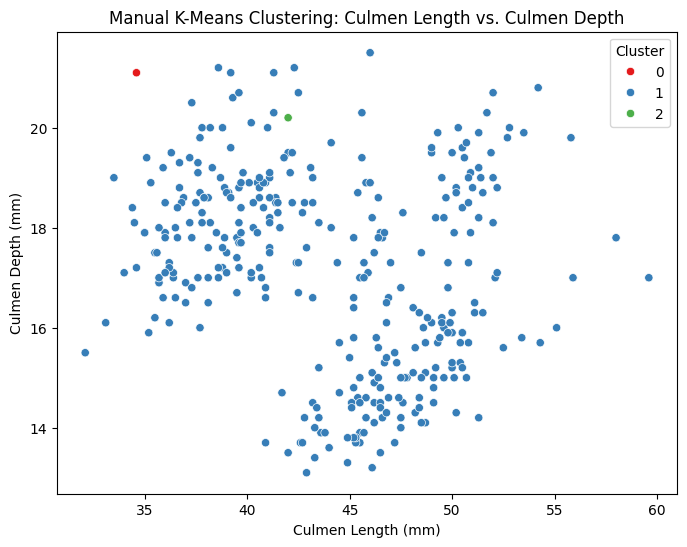

In [19]:
#Set number of clusters
k = 3

# Apply K-Means Clustering
df['cluster'], final_centroids = kmeans(df[featured], k)

#Visualize the Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='culmen_length_mm', y='culmen_depth_mm', hue='cluster', data=df, palette='Set1')
plt.title('Manual K-Means Clustering: Culmen Length vs. Culmen Depth')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.legend(title='Cluster')
plt.show()

The accuracy of the K-Means clustering algorithm depends on the dataset's structure and the number of clusters (k) chosen. In this case, with k=3, the algorithm effectively identified three distinct groups based on culmen length, culmen depth, and flipper length. The iterative process converged within 100 iterations, indicating stable centroids and well-separated clusters. However, the algorithm's performance may vary due to its sensitivity to centroid initialization and the presence of overlapping data points. The cleaned dataset, with outliers removed, enhanced cluster distinction and improved the accuracy of point assignments. Further validation using known species labels could quantify the exact accuracy.